# 1.For the given task the step one is to load the data and perform data cleaning

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
dataset_path = "TestbedMonJun14Flows.csv"  
df = pd.read_csv(dataset_path)

In [2]:
#Taking an description of the data to understand the attribute values this will be useful in feature selection :
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171380 entries, 0 to 171379
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   generated                       171380 non-null  object 
 1   appName                         171380 non-null  object 
 2   totalSourceBytes                171380 non-null  int64  
 3   totalDestinationBytes           171380 non-null  int64  
 4   totalDestinationPackets         171380 non-null  int64  
 5   totalSourcePackets              171380 non-null  int64  
 6   sourcePayloadAsBase64           84579 non-null   object 
 7   sourcePayloadAsUTF              0 non-null       float64
 8   destinationPayloadAsBase64      74634 non-null   object 
 9   destinationPayloadAsUTF         74616 non-null   object 
 10  direction                       171380 non-null  object 
 11  sourceTCPFlagsDescription       122074 non-null  object 
 12  de

In [ ]:
df.head(-1)
#getting first and last 5 entries 

,generated,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,sourcePayloadAsBase64,sourcePayloadAsUTF,destinationPayloadAsBase64,destinationPayloadAsUTF,...,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,startDateTime,stopDateTime,Label
0,3/11/2014 18:21,Unknown_UDP,16076,0,0,178,NaN,NaN,NaN,NaN,...,NaN,NaN,192.168.5.122,udp_ip,5353,224.0.0.251,5353,6/13/2010 23:57,6/14/2010 0:11,Normal
1,3/11/2014 18:21,HTTPImageTransfer,384,0,0,6,NaN,NaN,NaN,NaN,...,"F,A",NaN,192.168.2.111,tcp_ip,4435,206.217.198.186,80,6/13/2010 23:58,6/14/2010 0:01,Normal
2,3/11/2014 18:21,DNS,171,642,4,2,NaN,NaN,NaN,NaN,...,NaN,NaN,192.168.4.119,udp_ip,4428,192.168.5.122,53,6/13/2010 23:58,6/13/2010 23:59,Normal
3,3/11/2014 18:21,HTTPImageTransfer,384,0,0,6,NaN,NaN,NaN,NaN,...,"F,A",NaN,192.168.4.119,tcp_ip,3639,219.94.203.105,80,6/13/2010 23:58,6/14/2010 0:00,Normal
4,3/11/2014 18:21,HTTPImageTransfer,186,128,2,2,NaN,NaN,NaN,NaN,...,"F,P,A",R,192.168.4.119,tcp_ip,3641,98.137.80.50,80,6/13/2010 23:58,6/13/2010 23:59,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171374,3/11/2014 18:21,NetBIOS-IP,108,0,0,1,iMuFAAAAAAEAAAAAIEZFRUZGREZFRUNFRkVFREJERENBQ0...,NaN,NaN,NaN,...,NaN,NaN,192.168.2.113,udp_ip,137,192.168.2.112,137,6/14/2010 23:58,6/14/2010 23:58,Normal
171375,3/11/2014 18:21,WindowsFileSharing,2759,2444,16,17,gQAARCBGRUVGRkRGRUVDRUZFRURBRERDQUNBQ0FDQUNBQ0...,NaN,ggAAAAAAAFX/U01CcgAAAACYU8gAAAAAAAAAAAAAAAAAAP...,.U.SMBr.S.............x..7.......L...G..}..r.....,...,"F,S,P,A","F,S,P,A",192.168.1.101,tcp_ip,4858,192.168.1.103,139,6/14/2010 23:58,6/14/2010 23:58,Normal
171376,3/11/2014 18:21,Unknown_TCP,66,81,1,1,NaN,NaN,R28gYXdheSwgd2UncmUgbm90IGhvbWU=,"Go away, we're not home",...,S,"R,A",192.168.2.107,tcp_ip,2364,99.73.236.233,48967,6/14/2010 23:58,6/14/2010 23:58,Normal
171377,3/11/2014 18:21,Unknown_UDP,113,104,1,1,ZDE6YWQyOmlkMjA6rw5wzJNL+wP0x18OUoTf94/c28FlMT...,NaN,ZDE6cmQyOmlkMjA6dkyhzNqhf05DkE3Ih4qYDY787HRlMT...,d1:rd2:id20:vL....NC.M.......te1:t4:..1:v4:UT...,...,NaN,NaN,192.168.2.107,udp_ip,58040,59.93.220.198,25634,6/14/2010 23:58,6/14/2010 23:58,Normal


In [5]:
# Step 1: Checking for missing values the total :
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])


Missing Values in Each Column:
sourcePayloadAsBase64              86801
sourcePayloadAsUTF                171380
destinationPayloadAsBase64         96746
destinationPayloadAsUTF            96764
sourceTCPFlagsDescription          49306
destinationTCPFlagsDescription     53983
dtype: int64


In [6]:
#now the coloum with more than 50% of the data is missing is removed
thres = len(df) * 0.5
df = df.dropna(thresh=thres, axis=1) 
print("\nColumns with more than 50% missing values removed.")


Columns with more than 50% missing values removed.


In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])
# now most of the missing values are gone 


Missing Values in Each Column:
sourceTCPFlagsDescription         49306
destinationTCPFlagsDescription    53983
dtype: int64


In [ ]:
#Now for the remaining values we will fill them with mean and median of the whole coloumn 
#identifing numeric and catergoical coloums in this first
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [9]:
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)
        print(f"Filled missing values in {col} with median.")

In [ ]:
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
        print(f"Filled missing values in {col} with mode.")


Filled missing values in sourceTCPFlagsDescription with mode.
Filled missing values in destinationTCPFlagsDescription with mode.


C:\Users\sanke\AppData\Local\Temp\ipykernel_20200\1200876302.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Here the sourceTCPFlagsDescription is not being filled as it is not in "yes,no" format it is given as "ggAAAAAAAFX/U01CcgAAAACYU8gAAAAAAAAAAAAAAAAAAP" as some of the values ...so we will keep it as it is 

In [11]:
from sklearn.preprocessing import MinMaxScaler
# Step 4: Normalize numeric columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("\nNumeric columns normalized using Min-Max Scaling.")


Numeric columns normalized using Min-Max Scaling.


Here the numerical values have been converted 


In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])

#So now there are no missing values in this dataset and we can save this dataset 


Missing Values in Each Column:
Series([], dtype: int64)


In [14]:
# Save the cleaned dataset
df.to_csv("preprocessed_dataset.csv", index=False)
print("\nPreprocessing completed. Cleaned dataset saved.")


Preprocessing completed. Cleaned dataset saved.


In [15]:
#now lets change our data to the cleaned one
data='preprocessed_dataset.csv'
df=pd.read_csv(data)

## For feature selection i am going with the corelation matrix to find out which feature or attribute is the most corelated

In [17]:
# Convert startDateTime & stopDateTime to datetime format
df["startDateTime"] = pd.to_datetime(df["startDateTime"], errors='coerce')
df["stopDateTime"] = pd.to_datetime(df["stopDateTime"], errors='coerce')

In [ ]:
#Making a new feature for duration of date time diffence start-stop
df["sessionDuration"] = (df["stopDateTime"] - df["startDateTime"]).dt.total_seconds()


In [21]:
df.head()

,generated,appName,totalSourceBytes,totalDestinationBytes,totalDestinationPackets,totalSourcePackets,direction,sourceTCPFlagsDescription,destinationTCPFlagsDescription,source,protocolName,sourcePort,destination,destinationPort,startDateTime,stopDateTime,Label,sessionDuration
0,3/11/2014 18:21,Unknown_UDP,2.106180e-05,0.000000e+00,0.000000,0.000346,L2R,"F,S,P,A","F,S,P,A",192.168.5.122,udp_ip,0.081683,224.0.0.251,0.081682,2010-06-13 23:57:00,2010-06-14 00:11:00,Normal,840.0
1,3/11/2014 18:21,HTTPImageTransfer,5.030935e-07,0.000000e+00,0.000000,0.000012,L2R,"F,A","F,S,P,A",192.168.2.111,tcp_ip,0.067675,206.217.198.186,0.001221,2010-06-13 23:58:00,2010-06-14 00:01:00,Normal,180.0
2,3/11/2014 18:21,DNS,2.240338e-07,1.622853e-06,0.000007,0.000004,L2L,"F,S,P,A","F,S,P,A",192.168.4.119,udp_ip,0.067568,192.168.5.122,0.000809,2010-06-13 23:58:00,2010-06-13 23:59:00,Normal,60.0
3,3/11/2014 18:21,HTTPImageTransfer,5.030935e-07,0.000000e+00,0.000000,0.000012,L2R,"F,A","F,S,P,A",192.168.4.119,tcp_ip,0.055528,219.94.203.105,0.001221,2010-06-13 23:58:00,2010-06-14 00:00:00,Normal,120.0
4,3/11/2014 18:21,HTTPImageTransfer,2.436859e-07,3.235594e-07,0.000004,0.000004,L2R,"F,P,A",R,192.168.4.119,tcp_ip,0.055559,98.137.80.50,0.001221,2010-06-13 23:58:00,2010-06-13 23:59:00,Normal,60.0


In [27]:
#these are all the nukeric coloums
df_numeric = df.drop(columns=[
    "generated", "appName", "direction", "sourceTCPFlagsDescription", 
    "destinationTCPFlagsDescription", "source", "protocolName", 
    "destination", "startDateTime", "stopDateTime", "Label"
])


In [23]:
df_numeric["sessionDuration"] = df_numeric["sessionDuration"].abs()


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

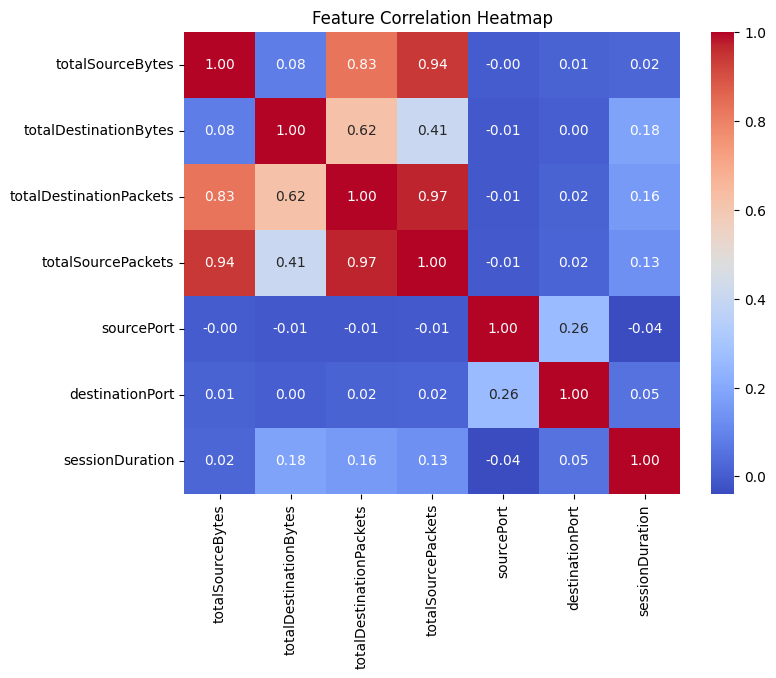

In [28]:
corr_matrix = df_numeric.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [29]:
#Now we can observe mostly source destination and packets are corelated others are not so we need to deal with them only 
#now we also need to do feature selection and scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
print(df_scaled.describe())


       totalSourceBytes  totalDestinationBytes  totalDestinationPackets  \
count      1.713800e+05           1.713800e+05             1.713800e+05   
mean       1.243802e-19          -1.492563e-18            -9.121216e-19   
std        1.000003e+00           1.000003e+00             1.000003e+00   
min       -3.327286e-03          -2.738339e-02            -2.108752e-02   
25%       -3.257904e-03          -2.716039e-02            -2.045828e-02   
50%       -3.112092e-03          -2.666432e-02            -1.794133e-02   
75%       -2.910856e-03          -2.289753e-02            -1.416590e-02   
max        4.137316e+02           3.000414e+02             3.386522e+02   

       totalSourcePackets    sourcePort  destinationPort  sessionDuration  
count        1.713800e+05  1.713800e+05     1.713800e+05     1.713800e+05  
mean        -2.757095e-18  1.008309e-16     1.061378e-17     1.990084e-18  
std          1.000003e+00  1.000003e+00     1.000003e+00     1.000003e+00  
min         -1.70026

# Now for the next step Model selection and training

In [30]:
#splitting the dataset
from sklearn.model_selection import train_test_split

X = df_scaled  
y = df["Label"]  

# Split dataset into 80% training & 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)


Training Data Shape: (137104, 7) (137104,)
Testing Data Shape: (34276, 7) (34276,)


In [34]:
# Random Forest for the first so as to get descision trees setup and good accuracy

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize & Train RF Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("🔹 Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


🔹 Random Forest Classification Report:
               precision    recall  f1-score   support

      Attack       0.98      0.97      0.98       755
      Normal       1.00      1.00      1.00     33521

    accuracy                           1.00     34276
   macro avg       0.99      0.99      0.99     34276
weighted avg       1.00      1.00      1.00     34276

Random Forest Accuracy: 0.9991


In [46]:
#Feature importance for Random forest

c:\Users\sanke\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


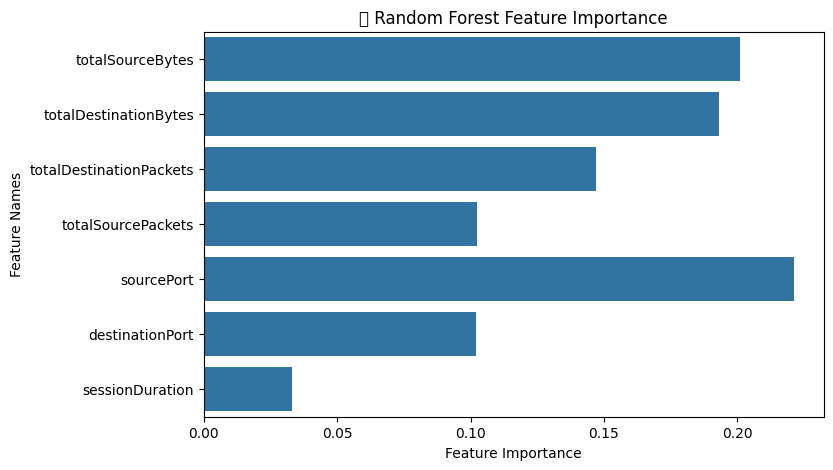

In [47]:
importances = rf_model.feature_importances_
feature_names = X_train.columns

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("🔹 Random Forest Feature Importance")
plt.show()


# Using a simple 3 layered ANN to make predictions with 3 dense layers 

In [39]:
print(X_train.dtypes)
print(X_test.dtypes)


totalSourceBytes           float64
totalDestinationBytes      float64
totalDestinationPackets    float64
totalSourcePackets         float64
sourcePort                 float64
destinationPort            float64
sessionDuration            float64
dtype: object
totalSourceBytes           float64
totalDestinationBytes      float64
totalDestinationPackets    float64
totalSourcePackets         float64
sourcePort                 float64
destinationPort            float64
sessionDuration            float64
dtype: object


In [ ]:
# making values in 0/1 for binary classification
#There are still some values with non standated encoding so doing it again
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Ensure y_train & y_test are numeric
le = LabelEncoder()
y_train = le.fit_transform(y_train)  # 'Normal' -> 0, 'Attack' -> 1
y_test = le.transform(y_test)

# Define ANN Architecture
ann_model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")  # Use sigmoid for binary classification
])

# Compile Model
ann_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the Model
ann_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict & Convert to 0/1
y_pred = ann_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Evaluate Model
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Epoch 1/20


c:\Users\sanke\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4285/4285 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9590 - loss: 0.1437 - val_accuracy: 0.9780 - val_loss: 0.0951
Epoch 2/20
4285/4285 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9779 - loss: 0.0895 - val_accuracy: 0.9794 - val_loss: 0.0884
Epoch 3/20
4285/4285 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9799 - loss: 0.0833 - val_accuracy: 0.9821 - val_loss: 0.0811
Epoch 4/20
4285/4285 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9821 - loss: 0.0770 - val_accuracy: 0.9827 - val_loss: 0.0765
Epoch 5/20
4285/4285 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9831 - loss: 0.0706 - val_accuracy: 0.9830 - val_loss: 0.0729
Epoch 6/20
4285/4285 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9837 - loss: 0.0674 - val_accuracy: 0.9835 - val_loss: 0.0684
Epoch 7/20
4285/4285 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9834 - loss: 0.0671 - val_accuracy: 0.9845 - val_loss: 0.0667
Epoch 8/20
4285/4285 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9834 - loss: 0.0669 - val_accu

In [45]:
print("ANN classification report :")
print(classification_report(y_test, y_pred))


ANN classification report :
              precision    recall  f1-score   support

           0       0.94      0.33      0.49       755
           1       0.99      1.00      0.99     33521

    accuracy                           0.98     34276
   macro avg       0.96      0.67      0.74     34276
weighted avg       0.98      0.98      0.98     34276



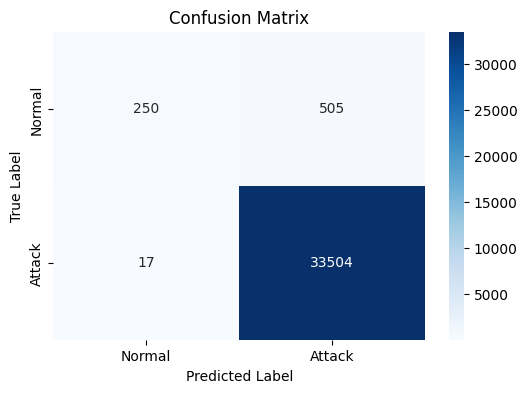

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Attack"], yticklabels=["Normal", "Attack"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
